<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/Lab1_main(not_good).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1.
**Численное дифференцирование**
---

Написать программу для численного дифференцирования сеточной
функции. Предусмотреть возможность аппроксимации первой и второй
производных с первым и вторым порядками.

Протестировать работу программы на заранее выбранной гладкой
функции. Сравнить результаты численного дифференцирования с проекциями производных тестовой функции на расчетную сетку. Построить
графики зависимости погрешности аппроксимации от шага сетки в логарифмическом масштабе. Оценить фактические порядки аппроксимации,
основываясь на полученных графиках.

---

Рассмотрим функцию $f(x) = x^2 \sin{x}$.

#TODO ...


Построим данную функцию задав на интервале $[-10, 10]$ c количеством точек = count.

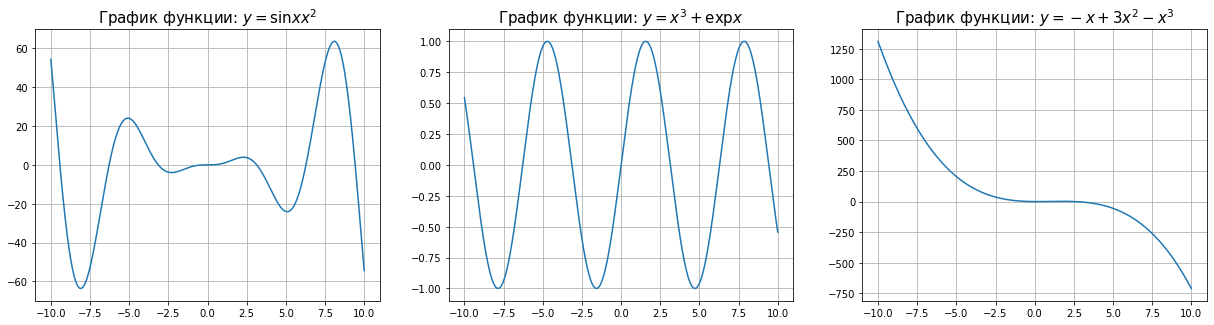

In [ ]:
from pickle import TRUE
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

count = 1000

x = np.linspace(-10, 10, count) 

func1 = lambda x: np.sin(x)*(x**2)
# func1 = lambda x: x * np.cos(x)
# func2 = lambda x: x**3 + np.exp(x)
func2 = lambda x: np.sin(x)
func3 = lambda x: -x+3*x**2-x**3
# func3 = lambda x: np.cos(x)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21, 5))
ax1.grid(TRUE)
ax2.grid(TRUE)
ax3.grid(TRUE)

ax1.plot(x, func1(x))
ax2.plot(x, func2(x))
ax3.plot(x, func3(x))

ax1.set_title('График функции: $y = \sin{x} x^2 $', fontsize=15)
ax2.set_title('График функции: $y = x^3 + \exp{x} $', fontsize=15)
ax3.set_title('График функции: $y = -x + 3x^2 - x^3 $', fontsize=15)



# ax1.plot(h_arr, delta_1_arr, color='green', label='погрешность метода аппроксимации первого порядка')

# fig, ax = plt.subplots(figsize=(8, 5))
# plt.plot(xs, ys1)

# ax.grid(TRUE)
# ax.text(0, 40, '$f(x) = x^2 \sin{x}$', fontsize=(20), horizontalalignment='center', verticalalignment='center')
# ax.set_title('График функции', fontsize=15)

plt.show()



> * Метод правой разницы для вычисления производной:
$$
    y'_x \approx \frac {y_{i+1} - y_{i}} {x_{i+1} - x_{i}} \\  
    y' _{x_n} = y' _{x_{n-1}}
$$

> * Метод левой разницы для вычисления производной:
$$
    y'_x \approx \frac {y_{i} - y_{i-1}} {x_{i} - x_{i-1}} \\
    y' _{x_0} = y' _{x_{1}}
$$

> * Метод центральной разности для вычисления производной:
$$
    y'_x \approx \frac {y_{i+1} - y_{i-1}} {x_{i+1} - x_{i-1}} \\
    y' _{x_0} = \frac {-3 y_{x_0} + 4 y_{x_1} - y _{x_2}} {2h} \\
    y' _{x_{n-1}} = \frac {3 y_{x_{n-1}} - 4 y_{x_{n-2}} + y _{x_{n-3}}} {2h}
$$
 

Производная исходной функции: 
$f'_x = 2x \sin{x} + x^{2} \cos{x}$

Рассмотрим метод правой и левой разницы для численного дифференцирования функции.

Для численного дифференцирования функции, возьмём также промежуток $[-10, 10]$ с шагом $h$.

Построим график первой производной исходной функции и графики, исходя из методов. 

In [ ]:
func_diff_1 = lambda x: 2*x*np.sin(x) + (x**2) * np.cos(x)
# func_diff_1 = lambda x: np.cos(x) - x*np.sin(x)

func_diff_2 = lambda x: np.cos(x)
# func_diff_2 = lambda x: 3*x**2 + np.exp(x)
func_diff_3 = lambda x: -1 + 6*x - 3*x**2
# func_diff_3 = lambda x: -np.sin(x)

h = 1

x_new = np.arange(-10, 10.01, h)

# list_func = [func1(x_new), func2(x_new), func3(x_new)]
# ys_new = np.sin(x_new)*(x_new**2)

# for func in list_func:

def diff_function(x_new, h, function):

    func = function(x_new)

    # diff_x = diff_x_left = diff_x_right = np.diff(x_new)

    diff_left = [(func[i] - func[i-1]) / h for i in range(1, len(func))]
    diff_right = [(func[i+1] - func[i]) / h for i in range(0, len(func)-1)]

    # diff_left = diff_y_left / h
    # diff_right = diff_y_right / h

    diff_left = np.insert(diff_left, 0, diff_left[0])
    diff_right = np.append(diff_right, diff_right[-1])

    # diff_y_center = [(func[i+1] - func[i-1]) for i in range(1, len(func)-1)]

    diff_center_temp = [(func[i+1] - func[i-1]) / (2*h) for i in range(1, len(func)-1)]

    # diff_center_temp = diff_y_center / (diff_x[1:] * 2)
    temp = np.insert(diff_center_temp, 0, (-3*func[0] + 4*func[1] - func[2]) / (2*h) )
    diff_center = np.append(temp,  (3*func[-1] - 4*func[-2] + func[-3]) / (2*h) )

    return diff_left, diff_right, diff_center




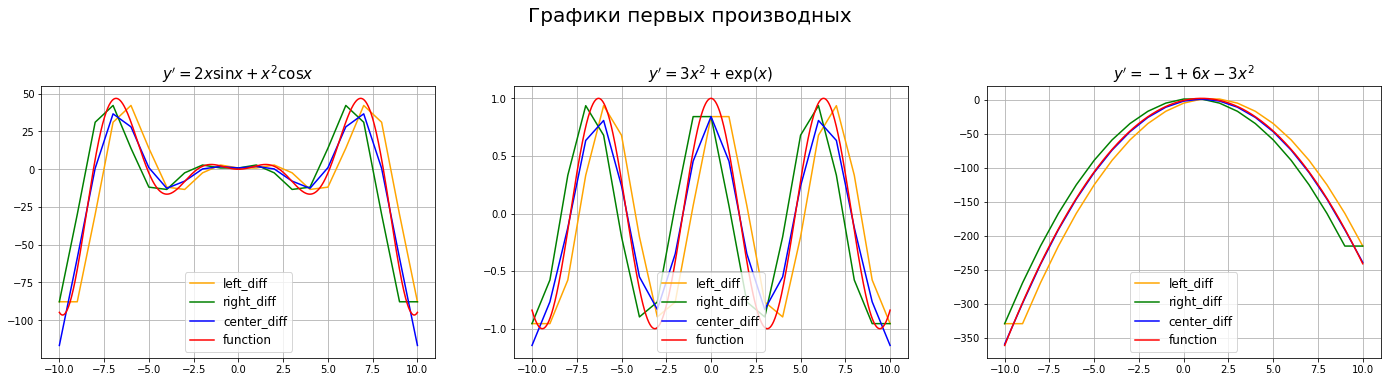

In [ ]:
diff1 = diff_function(x_new, h, func1)
diff2 = diff_function(x_new, h, func2)
diff3 = diff_function(x_new, h, func3)

list_diff = [diff1, diff2, diff3]

list_diff_func = [func_diff_1, func_diff_2, func_diff_3]

fig, axes = plt.subplots(1, 3, figsize = (24, 5))
fig.suptitle('Графики первых производных', y = 1.1, fontsize = 20)

for i in range(len(axes)):
    ax = axes[i]
    diff = list_diff[i]
    diff_func = list_diff_func[i]

    ax.grid(TRUE)
    ax.plot(x_new, diff[0], color='orange', label='left_diff')
    ax.plot(x_new, diff[1], color='green', label='right_diff')
    ax.plot(x_new, diff[2], color='blue', label='center_diff')
    ax.plot(x, diff_func(x), color='red', label='function')
    ax.legend(loc='lower center', fontsize='large')
    
axes[0].set_title('$y\' = 2x \sin{x} + x^2 \cos{x}$', loc='center', fontsize=15)
axes[1].set_title('$y\' = 3x^2 + \exp{(x)}$', loc='center', fontsize=15)
axes[2].set_title('$y\' = -1 + 6x - 3 x^2$', loc='center', fontsize=15)


plt.show()

Оценим погрешности для метода правой разницы (метод аппроксимации первой производной первого порядка):

$$
\Delta_1 = M_2 \frac{h}{2} + \frac{2 \delta}{h}
$$

А также для метода центральной разницы (метод аппроксимации первой производной второго порядка):

$$
\Delta_2 = M_3 \frac{h^2}{6} + \frac{\delta}{h}
$$


Построим графики погрешности первой производной функции от шага $h$ для каждого из методов (также и в логарифмичеком масштабе)

In [ ]:
# points = 1000
count = 50

# h_arr = np.linspace(1e-4, 1e-1, count)
h_arr = np.linspace(1e-5, 1e-1, count)

In [ ]:
# func = func1
# diff_func = func_diff_1

def error_of_methods(count, h_arr, func, diff_func):

    delta_1_arr = [] # for right method
    delta_2_arr = [] # for center method

    
    # diff_right = lambda x, h: (func(x + h) - func(x) ) / h 
    # diff_center = lambda x, h: (func(x + h) - func(x - h) ) / (2*h)
    
    # diff_center_insert = lambda x, h: (-3*func(x) + 4*func(x + h) - func(x + 2*h) ) / (2*h) #x = x_arr[0]
    # diff_center_append = lambda x, h: (3*func(x) - 4*func(x - h) + func(x - 2*h) ) / (2*h) #x = x_arr[-1]

    for h_i in h_arr:
        x_arr = np.arange(-count/2 * h_i, count/2 * h_i, h_i)
        
        diff_left, diff_right, diff_center = diff_function(x_arr, h_i, func)

        # x0 = 0.1
        # list_diff_right = []
        # list_diff_center = []

        diff_func_new = diff_func(x_arr)
        # for x0 in x_arr[1:-1]:
        # for x0 in x_arr:
        delta_1_arr.append(np.max(np.abs(diff_func_new - diff_right)) ) 
        delta_2_arr.append(np.max(np.abs(diff_func_new - diff_center)) )

    print(delta_1_arr)
        # только для правой разницы
        # list_diff_right.append( np.abs(diff_func(x_arr[-1]) - diff_right(x_arr[-2], h_i) )) 
        # list_diff_right.insert(0, np.abs(diff_func(x_arr[0]) - diff_right(x_arr[0], h_i) )) 

        # только для центральной разницы
        # list_diff_center.append( np.abs(diff_func(x_arr[-1]) - diff_center_append(x_arr[-1], h_i) )) 
        # list_diff_center.insert(0, np.abs(diff_func(x_arr[0]) - diff_center_insert(x_arr[0], h_i) )) 

        # delta_1 = np.max(list_diff_right)
        # delta_2 = np.max(list_diff_center)
        
        # delta_1_arr.append(list_diff_right)
        # delta_2_arr.append(list_diff_center)
        
    return delta_1_arr, delta_2_arr



In [ ]:
# bad function ###

# func = func1
# diff_func = func_diff_1

'''
def error_of_methods(count, h_arr, func, diff_func):

    delta_1_arr = [] # for right method
    delta_2_arr = [] # for center method

    # diff_right = diff_function(x_arr, h_arr, )
    diff_right = lambda x, h: (func(x + h) - func(x) ) / h 
    diff_center = lambda x, h: (func(x + h) - func(x - h) ) / (2*h)
    
    diff_center_insert = lambda x, h: (-3*func(x) + 4*func(x + h) - func(x + 2*h) ) / (2*h) #x = x_arr[0]
    diff_center_append = lambda x, h: (3*func(x) - 4*func(x - h) + func(x - 2*h) ) / (2*h) #x = x_arr[-1]

    for h_i in h_arr:
        x_arr = np.arange(-count/2 * h_i, count/2 * h_i, h_i)

        # x0 = 0.1
        list_diff_right = []
        list_diff_center = []


        # for x0 in x_arr[1:-1]:
        for x0 in x_arr:
            list_diff_right.append(np.abs(diff_func(x0) - diff_right(x0, h_i)) ) 
            list_diff_center.append(np.abs(diff_func(x0) - diff_center(x0, h_i)) )

        # только для правой разницы
        list_diff_right.append( np.abs(diff_func(x_arr[-1]) - diff_right(x_arr[-2], h_i) )) 
        list_diff_right.insert(0, np.abs(diff_func(x_arr[0]) - diff_right(x_arr[0], h_i) )) 

        # только для центральной разницы
        list_diff_center.append( np.abs(diff_func(x_arr[-1]) - diff_center_append(x_arr[-1], h_i) )) 
        list_diff_center.insert(0, np.abs(diff_func(x_arr[0]) - diff_center_insert(x_arr[0], h_i) )) 

        delta_1 = np.max(list_diff_right)
        delta_2 = np.max(list_diff_center)
        
        delta_1_arr.append(delta_1)
        delta_2_arr.append(delta_2)
        
    return delta_1_arr, delta_2_arr

'''

In [ ]:
delta_func1 = error_of_methods(count, h_arr, func1, func_diff_1)
delta_func2 = error_of_methods(count, h_arr, func2, func_diff_2)
delta_func3 = error_of_methods(count, h_arr, func3, func_diff_3)


[7.399999749793588e-09, 0.00031072848347697864, 0.0012316183119663697, 0.002747070021087483, 0.004831244807233084, 0.0074482787076600165, 0.010552570247870319, 0.014089147285902659, 0.0179941109204641, 0.02219515387757809, 0.02661215035062614, 0.031157813843645576, 0.03573841915949216, 0.04025458428506257, 0.04460210755708993, 0.04867285514583797, 0.052355693572492035, 0.05565884263674059, 0.058930657256548, 0.06220087480122194, 0.06546847528965283, 0.06874222298721255, 0.0720182559405882, 0.07528332738952526, 0.07855408680715104, 0.08181333665348745, 0.08508989531633304, 0.08833482973297802, 0.09163996126322349, 0.0948757266875413, 0.09817381188876473, 0.10136429664207491, 0.10471656972245014, 0.10797612290531289, 0.11121883435504154, 0.11450077789460322, 0.11777093360773794, 0.1340970857575461, 0.16019866508025027, 0.18775612552476995, 0.21666595878430273, 0.24680815136673995, 0.2780462564360999, 0.31022757015489355, 0.3431834140343887, 0.3767295242697661, 0.41066654849510487, 0.4447

In [ ]:
# ax1.set_title('График функции: $y = x^2 \sin{x} $', fontsize=15)
# ax2.set_title('График функции: $y = x^3 + \exp{x} $', fontsize=15)
# ax3.set_title('График функции: $y = -x + 3x^2 - x^3 $', fontsize=15)


def plot_error_func(delta_func, title):

    # 1 график
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7))
    fig.suptitle(title, fontsize = 15, y = 1.1, fontweight='bold')

    ax1.scatter(h_arr, delta_func[0], color='green', label='погрешность метода аппроксимации первого порядка')
    ax1.scatter(h_arr, delta_func[1], color='blue', label='погрешность метода аппроксимации второго порядка')

    ax2.scatter(np.log(h_arr), np.log(delta_func[0]), color='green', label='погрешность метода аппроксимации первого порядка')
    ax2.scatter(np.log(h_arr), np.log(delta_func[1]), color='blue', label='погрешность метода аппроксимации второго порядка')

    # ax2.loglog(h_arr, delta_func[0], color='green', label='погрешность метода аппроксимации первого порядка')
    # ax2.loglog(h_arr, delta_func[1], color='blue', label='погрешность метода аппроксимации второго порядка')

    ax1.legend(loc='upper center', fontsize='large')
    ax2.legend(loc='upper center', fontsize='large')

    ax1.grid(TRUE)
    ax2.grid(TRUE)

    ax1.set_title('График зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax1.set_xlabel('шаг - h', fontsize=13)
    ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)

    ax2.set_title('График логарифмической зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax2.set_xlabel('шаг - $\ln{h}$', fontsize=13)
    ax2.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)

    plt.show()

    return

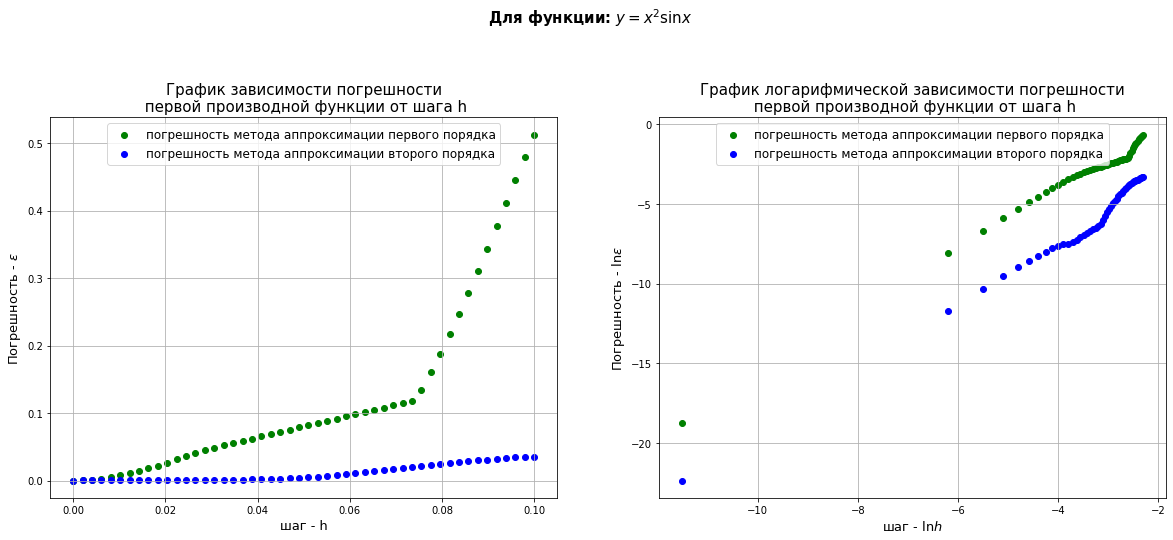

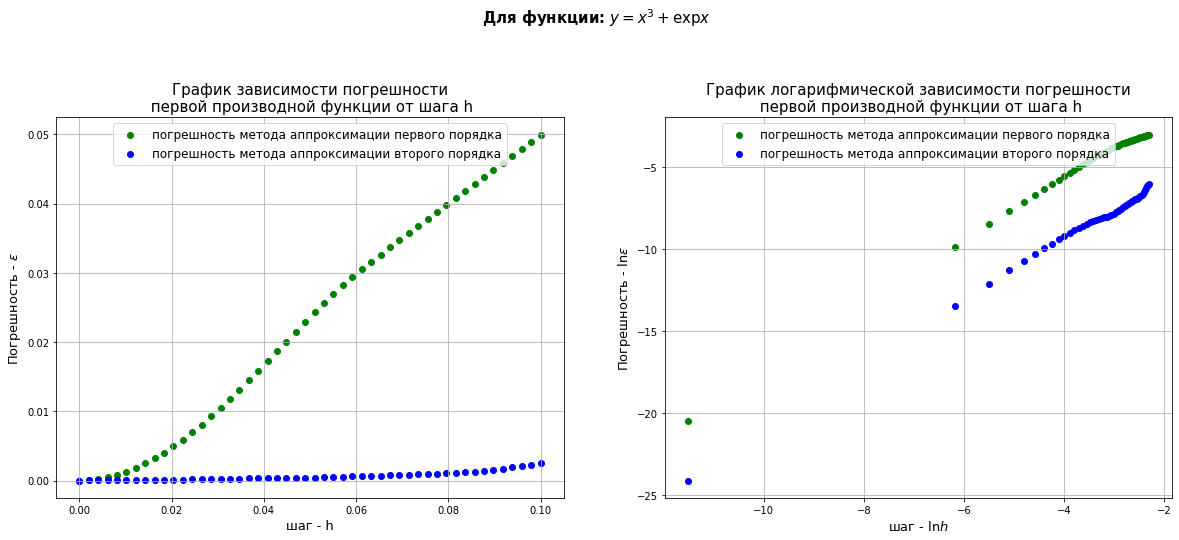

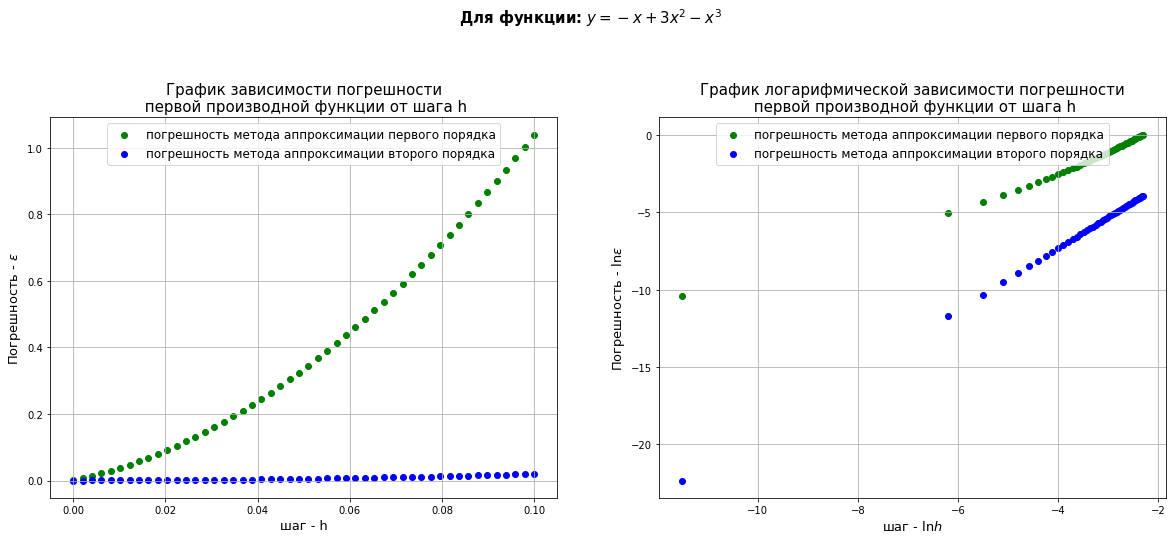

In [ ]:



title1 = 'Для функции: $y = x^2 \sin{x} $'
title2 = 'Для функции: $y = x^3 + \exp{x} $'
title3 = 'Для функции: $y = -x + 3x^2 - x^3 $'

plot_error_func(delta_func1, title1)
plot_error_func(delta_func2, title2)
plot_error_func(delta_func3, title3)

In [ ]:
'''
def plot_error_func_log(delta_func, title):

    # 1 график
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7))
    fig.suptitle(title, fontsize = 15, y = 1.1, fontweight='bold')

    # ax1.plot(h_arr, delta_func[0], color='green', label='погрешность метода аппроксимации первого порядка')
    # ax1.plot(h_arr, delta_func[1], color='blue', label='погрешность метода аппроксимации второго порядка')

    ax2.loglog(h_arr, delta_func[0], color='green', label='погрешность метода аппроксимации первого порядка')
    ax2.loglog(h_arr, delta_func[1], color='blue', label='погрешность метода аппроксимации второго порядка')

    ax1.legend(loc='upper center', fontsize='large')
    ax2.legend(loc='upper center', fontsize='large')

    ax1.grid(TRUE)
    ax2.grid(TRUE)

    ax1.set_title('График зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax1.set_xlabel('шаг - h', fontsize=13)
    ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)

    ax2.set_title('График логарифмической зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax2.set_xlabel('шаг - $\ln{h}$', fontsize=13)
    ax2.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)

    plt.show()

    return
'''

In [ ]:
from scipy.stats import linregress

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log(h_arr), np.log(delta_func3[0]))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(np.log(h_arr), np.log(delta_func3[1]))
print('k1 = ', slope1)
print('k2 = ', slope2)



k1 =  1.0004023061663425
k2 =  2.0000890372130606


In [ ]:
import scipy as sp

# array = np.linspace(1e-3, 1e-1, count) 
# array = np.arange(-9, -2.5, 100)

array = [(i) for i in np.log(h_arr) if i > -5 and i < -2.5 ]
A = np.vstack([array, np.ones(len(array))]).T

# func_arr = np.log(delta.)
# temp = np.log(delta_func1[0]) if 


k1, b1 = np.linalg.lstsq(A, np.log(delta_func1[0][-len(array):]), rcond=None)[0]
print('k1(right_diff) = ', k1)

new_array = [(i) for i in np.log(h_arr) if i > -5 and i < -2.5]
B = np.vstack([new_array, np.ones(len(new_array))]).T

k2, b2 = np.linalg.lstsq(B, np.log(delta_func1[1][-len(new_array):]), rcond=None)[0]
print('k2(central_diff) = ', k2)



# list_delta_func = [delta_func1, delta_func2, delta_func3]

# fig, axes = plt.subplots(1, 3, figsize = (24, 5))


'''
for i in range(len(axes)):
    ax = axes[i]
    delta_func = list_delta_func[i]

    ax.grid(TRUE)
    ax.plot(np.log(h_arr), np.log(delta_func[0]), color='green', label='погрешность метода аппроксимации первого порядка')
    ax.plot(np.log(h_arr), np.log(delta_func[1]), color='blue', label='погрешность метода аппроксимации второго порядка')
    
    ax.set_title('График логарифмической зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax.set_xlabel('шаг - $\ln{h}$', fontsize=13)
    ax.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)


    k1, b1 = np.linalg.lstsq(A, np.log(delta_func[0]), rcond=None)[0]
    # ax.text(1e-9, 2e-6, 'k1(right_diff) = %f' % k1, fontsize=15)
    print('k1(right_diff) = ', k1)

    # ax1.text(1e-9, 2e-6, 'k1(right_diff) = %f' % k1, fontsize=15)
    # ax1.loglog(h_arr, delta_1_arr, 'o', color)

    k2, b2 = np.linalg.lstsq(A, np.log(delta_func[1]), rcond=None)[0]
    print('k2(central_diff) = ', k2)


    # ax.plot(x_new, diff[0], color='orange')
    # ax.plot(x_new, diff[1], color='green', label='right_diff')
    # ax.plot(x_new, diff[2], color='blue', label='center_diff')
    # ax.plot(x, diff_func(x), color='red', label='function')
    # ax.legend(loc='lower center', fontsize='large')
    
# axes[0].set_title('$y\' = 2x \sin{x} + x^2 \cos{x}$', loc='center', fontsize=15)
# axes[1].set_title('$y\' = 3x^2 + \exp{(x)}$', loc='center', fontsize=15)
# axes[2].set_title('$y\' = -1 + 6x - 3 x^2$', loc='center', fontsize=15)


plt.show()

'''

LinAlgError: ignored

In [ ]:
# delta_func2

import scipy as sp

# array = np.linspace(1e-3, 1e-1, count) 
# array = np.arange(-9, -2.5, 100)

array = [(i) for i in np.log(h_arr) if i > -5 and i < -3 ]
A = np.vstack([array, np.ones(len(array))]).T

# func_arr = np.log(delta.)
# temp = np.log(delta_func1[0]) if 


k1, b1 = np.linalg.lstsq(A, np.log(delta_func2[0][-len(array):]), rcond=None)[0]
print('k1(right_diff) = ', k1)

new_array = [(i) for i in np.log(h_arr) if i > -9 and i < -2.5]
B = np.vstack([new_array, np.ones(len(new_array))]).T

k2, b2 = np.linalg.lstsq(B, np.log(delta_func2[1][-len(new_array):]), rcond=None)[0]
print('k2(central_diff) = ', k2)


LinAlgError: ignored

k1(right_diff) =  1.9999991590082125
k2(central_diff) =  1.9999987697181407
k1(right_diff) =  2.002230246836816
k2(central_diff) =  1.9929021342427673
k1(right_diff) =  1.0004023061663425
k2(central_diff) =  2.0000890372130598


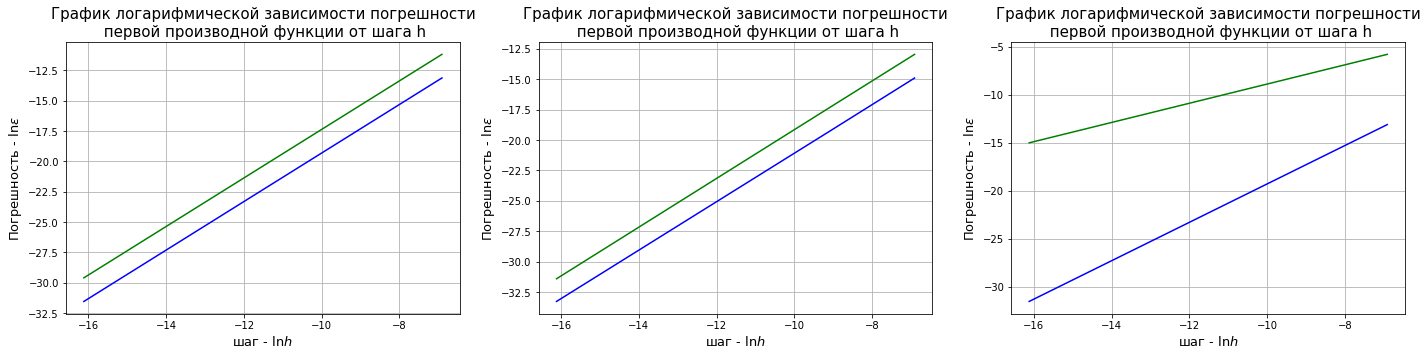

In [ ]:
#bad version
import scipy as sp

# array = np.linspace(1e-3, 1e-1, count) 
array = h_arr
A = np.vstack([np.log(array), np.ones(len(array))]).T

list_delta_func = [delta_func1, delta_func2, delta_func3]

fig, axes = plt.subplots(1, 3, figsize = (24, 5))
# fig.suptitle('Графики первых производных', y = 1.1, fontsize = 20)

for i in range(len(axes)):
    ax = axes[i]
    delta_func = list_delta_func[i]

    ax.grid(TRUE)
    ax.plot(np.log(h_arr), np.log(delta_func[0]), color='green', label='погрешность метода аппроксимации первого порядка')
    ax.plot(np.log(h_arr), np.log(delta_func[1]), color='blue', label='погрешность метода аппроксимации второго порядка')
    
    ax.set_title('График логарифмической зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
    ax.set_xlabel('шаг - $\ln{h}$', fontsize=13)
    ax.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)


    k1, b1 = np.linalg.lstsq(A, np.log(delta_func[0]), rcond=None)[0]
    # ax.text(1e-9, 2e-6, 'k1(right_diff) = %f' % k1, fontsize=15)
    print('k1(right_diff) = ', k1)

    # ax1.text(1e-9, 2e-6, 'k1(right_diff) = %f' % k1, fontsize=15)
    # ax1.loglog(h_arr, delta_1_arr, 'o', color)

    k2, b2 = np.linalg.lstsq(A, np.log(delta_func[1]), rcond=None)[0]
    print('k2(central_diff) = ', k2)


    # ax.plot(x_new, diff[0], color='orange')
    # ax.plot(x_new, diff[1], color='green', label='right_diff')
    # ax.plot(x_new, diff[2], color='blue', label='center_diff')
    # ax.plot(x, diff_func(x), color='red', label='function')
    # ax.legend(loc='lower center', fontsize='large')
    
# axes[0].set_title('$y\' = 2x \sin{x} + x^2 \cos{x}$', loc='center', fontsize=15)
# axes[1].set_title('$y\' = 3x^2 + \exp{(x)}$', loc='center', fontsize=15)
# axes[2].set_title('$y\' = -1 + 6x - 3 x^2$', loc='center', fontsize=15)


plt.show()

In [ ]:
#NEW VERSION

'''
func_diff_1 = lambda x: 2*x*np.sin(x) + (x**2) * np.cos(x)
# func_diff_1 = lambda x: np.cos(x) - x*np.sin(x)

func_diff_2 = lambda x: np.cos(x)
# func_diff_2 = lambda x: 3*x**2 + np.exp(x)
func_diff_3 = lambda x: -1 + 6*x - 3*x**2
# func_diff_3 = lambda x: -np.sin(x)
'''

func_diff_diff_1 = lambda x: (2 - x**2) * np.sin(x) + 4 * x * np.cos(x)
func_diff_diff_2 = lambda x: -np.sin(x)
func_diff_diff_3 = lambda x: 6 - 6*x


h = 1

x_new = np.arange(-10, 10.01, h)


def diff_diff_function(x_new, function):
    func = function(x_new)
    diff_x = diff_x_left = diff_x_right = np.diff(x_new)

    diff_diff_right = [(func[i+2] - 2*func[i+1] + func[i]) / (h**2) for i in range(len(func)-2)] 
    diff_diff_center = [(func[i+1] - 2*func[i] + func[i-1]) / (h**2) for i in range(1, len(func)-1)]

    

'''
def diff_function(x_new, function):

    func = function(x_new)

    diff_x = diff_x_left = diff_x_right = np.diff(x_new)

    diff_y_right = [(func[i+1] - func[i]) for i in range(0, len(func)-1)]
    diff_y_left = [(func[i] - func[i-1]) for i in range(1, len(func))]

    diff_left = diff_y_left / diff_x_left
    diff_right = diff_y_right / diff_x_right

    diff_left = np.insert(diff_left, 0, diff_left[0])
    diff_right = np.append(diff_right, diff_right[-1])

    diff_y_center = [(func[i+1] - func[i-1]) for i in range(1, len(func)-1)]

    diff_center_temp = diff_y_center / (diff_x[1:] * 2)
    temp = np.insert(diff_center_temp, 0, (-3*func[0] + 4*func[1] - func[2]) / (2*h) )
    diff_center = np.append(temp,  (3*func[-1] - 4*func[-2] + func[-3]) / (2*h) )

    return diff_left, diff_right, diff_center
'''



In [ ]:
diff_diff_right = [(ys_new[i+2] - 2*ys_new[i+1] + ys_new[i]) / (h**2) for i in range(len(ys_new)-2)] 

diff_diff_center = [(ys_new[i+1] - 2*ys_new[i] + ys_new[i-1]) / (h**2) for i in range(1, len(ys_new)-1)] 


fig, ax = plt.subplots(figsize=(10, 7))

ax.grid(TRUE)

ax.plot(xs, func_diff_2, color='blue', label='исходная функция')
ax.plot(xs_new[:-2], diff_diff_right, color='green', label='правая разница')
ax.plot(xs_new[1:-1], diff_diff_center, color='red', label='левая разница')
ax.legend()
ax.set_title('Графики зависимости вторых производных функции', fontsize=15)
plt.show()


In [ ]:
#INCORRECT
import scipy as sp

delta_h = 1e-6

h_arr = np.arange(1e-10, 1e-2, delta_h)

delta_1_arr = []
delta_2_arr = []

func = lambda x: np.sin(x)*(x**2)
diff_func = lambda x: 2*x * np.sin(x) + (x ** 2) * np.cos(x)

for h_i in h_arr:

    x0 = 0.1

    diff_right = ( func(x0 + h_i) - func(x0) ) / h_i


    diff_center = ( func(x0 + h_i) - func(x0 - h_i) ) / (2*h_i) 

    delta_1 = np.abs(diff_func(x0) - diff_right)
    delta_2 = np.abs(diff_func(x0) - diff_center)
    
    delta_1_arr.append(delta_1)
    delta_2_arr.append(delta_2)



fig, ax1 = plt.subplots(figsize = (10, 7))
ax.grid(TRUE)

ax1.plot(h_arr, delta_1_arr, color='green', label='погрешность метода аппроксимации первого порядка')
ax1.plot(h_arr, delta_2_arr, color='blue', label='погрешность метода аппроксимации второго порядка')

ax1.legend(loc='upper center', fontsize='large')

ax1.grid(TRUE)

ax1.set_title('График зависимости погрешности\n первой производной функции от шага h', loc='center', fontsize=15)
ax1.set_xlabel('шаг - h', fontsize=13)
ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)


A = np.vstack([np.log(h_arr), np.ones(len(h_arr))]).T

k1, b1 = np.linalg.lstsq(A, np.log(delta_1_arr), rcond=None)[0]
print('k1(right_diff) = ', k1)

# ax1.text(1e-9, 2e-6, 'k1(right_diff) = %f' % k1, fontsize=15)
###
# ax1.loglog(h_arr, delta_1_arr, 'o', color)

k2, b2 = np.linalg.lstsq(A, np.log(delta_2_arr), rcond=None)[0]
print('k2(central_diff) = ', k2)

# ax1.text(1e-9, 1.7e-6, 'k2(central_diff) = % f'% k2, fontsize=15)

plt.show()

---
Вторая производная исходной функции: $f''_x = (2-x^2) \sin{x} + 4x \cos{x}$

> * Метод правой разницы для вычисления второй производной функции: *(дает аппроксимацию первого порядка)*
    
$$
    f''_x = \frac{f(x+2h) - 2 f(x+h) + f(x) }{h^2}
$$

> * Метод центральной разницы для вычислений второй производной функции: *(дает аппроксимацию второго порядка)*
$$
    f''_x = \frac{f(x+h) - 2 f(x) + f(x-h) }{h^2}
$$


---

Построим график зависимости второй производной функции. 

Также построим графики вторых производных исходя из численных методов с некоторым шагом $h$.

In [ ]:
func = lambda x: np.sin(x)*(x**2)

diff_func = lambda x: 2*x * np.sin(x) + (x ** 2) * np.cos(x)

diff_diff_func = lambda x: (2 - x**2) * np.sin(x) + 4 * x * np.cos(x)


count = 1000
xs = np.linspace(-10, 10, count) 
func_diff_2 = diff_diff_func(xs)

h = 0.5

xs_new = np.arange(-10, 10, h)
ys_new = func(xs_new)


diff_diff_right = [(ys_new[i+2] - 2*ys_new[i+1] + ys_new[i]) / (h**2) for i in range(len(ys_new)-2)] 

diff_diff_center = [(ys_new[i+1] - 2*ys_new[i] + ys_new[i-1]) / (h**2) for i in range(1, len(ys_new)-1)] 


fig, ax = plt.subplots(figsize=(10, 7))

ax.grid(TRUE)

ax.plot(xs, func_diff_2, color='blue', label='исходная функция')
ax.plot(xs_new[:-2], diff_diff_right, color='green', label='правая разница')
ax.plot(xs_new[1:-1], diff_diff_center, color='red', label='левая разница')
ax.legend()
ax.set_title('Графики зависимости вторых производных функции', fontsize=15)
plt.show()





---


Оценим погрешности для метода правой разницы (метод аппроксимации второй производной первого порядка):

$$
\Delta_1 = M_3 h + \frac{5 \delta}{h^2}
$$

А также для метода центральной разницы (метод аппроксимации второй производной второго порядка):

$$
\Delta_2 = M_4 \frac{h^2}{12} + \frac{4 \delta}{h^2}
$$


Построим графики погрешности второй производной функции от шага $h$ для каждого из методов (также и в логарифмичеком масштабе)

In [ ]:
delta_h = 1e-6

h_arr = np.arange(1e-7, 1e-5, delta_h)

delta_1_arr = []
delta_2_arr = []

func = lambda x: np.sin(x)*(x**2)
diff_func = lambda x: 2*x * np.sin(x) + (x ** 2) * np.cos(x)
diff_diff_func = lambda x: (2 - x**2) * np.sin(x) + 4 * x * np.cos(x)

for h_i in h_arr:

    x0 = 0.1

    diff_diff_right = ( func(x0 + 2*h_i) - 2*func(x0 + h_i) + func(x0) ) / (h_i**2)


    diff_diff_center = ( func(x0 + h_i) - 2*func(x0) + func(x0 - h_i) ) / (h_i**2) 

    delta_1 = np.abs(diff_diff_func(x0) - diff_diff_right)
    delta_2 = np.abs(diff_diff_func(x0) - diff_diff_center)
    
    delta_1_arr.append(delta_1)
    delta_2_arr.append(delta_2)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7))
ax.grid(TRUE)

ax1.plot(h_arr, delta_1_arr, color='green', label='погрешность метода аппроксимации первого порядка(правая разность)')
ax1.plot(h_arr, delta_2_arr, color='blue', label='погрешность метода аппроксимации второго порядка(центральная разность)')

ax2.loglog(h_arr, delta_1_arr, color='green', label='погрешность метода аппроксимации первого порядка(правая разность)')
ax2.loglog(h_arr, delta_2_arr, color='blue', label='погрешность метода аппроксимации второго порядка(центральная разность)')

ax1.legend(loc='upper center', fontsize='large')
ax2.legend(loc='upper center', fontsize='large')

ax1.grid(TRUE)
ax2.grid(TRUE)

ax1.set_title('График зависимости погрешности\n второй производной функции от шага h', loc='center', fontsize=15)
ax1.set_xlabel('шаг - h', fontsize=13)
ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)

ax2.set_title('График логарифмической зависимости погрешности\n второй производной функции от шага h', loc='center', fontsize=15)
ax2.set_xlabel('шаг - $\ln{h}$', fontsize=13)
ax2.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)

plt.show()



In [ ]:
delta_h = 1e-6

h_arr = np.arange(1e-7, 1e-2, delta_h)

delta_1_arr = []
delta_2_arr = []

func = lambda x: np.sin(x)*(x**2)
diff_func = lambda x: 2*x * np.sin(x) + (x ** 2) * np.cos(x)
diff_diff_func = lambda x: (2 - x**2) * np.sin(x) + 4 * x * np.cos(x)

for h_i in h_arr:

    x0 = 0.1

    diff_diff_right = ( func(x0 + 2*h_i) - 2*func(x0 + h_i) + func(x0) ) / (h_i**2)


    diff_diff_center = ( func(x0 + h_i) - 2*func(x0) + func(x0 - h_i) ) / (h_i**2) 

    delta_1 = np.abs(diff_diff_func(x0) - diff_diff_right)
    delta_2 = np.abs(diff_diff_func(x0) - diff_diff_center)
    
    delta_1_arr.append(delta_1)
    delta_2_arr.append(delta_2)


fig, ax1 = plt.subplots(figsize = (10, 7))
ax.grid(TRUE)

ax1.plot(h_arr, delta_1_arr, color='green', label='погрешность метода аппроксимации первого порядка(правая разность)')
ax1.plot(h_arr, delta_2_arr, color='blue', label='погрешность метода аппроксимации второго порядка(центральная разность)')

ax1.legend(loc='upper center', fontsize='large')

ax1.grid(TRUE)

ax1.set_title('График зависимости погрешности\n второй производной функции от шага h', loc='center', fontsize=15)
ax1.set_xlabel('шаг - h', fontsize=13)
ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)

A = np.vstack([np.log(h_arr), np.ones(len(h_arr))]).T

k1, b1 = np.linalg.lstsq(A, np.log(delta_1_arr), rcond=None)[0]
print('k1(right_diff) = ', k1)

k2, b2 = np.linalg.lstsq(A, np.log(delta_2_arr), rcond=None)[0]
print('k2(central_diff) = ', k2)

plt.show()
